In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import csv
import seaborn as sns
from collections import Counter

import statistics as stats

from numpy.random import seed

import seaborn as sns; sns.set()

import os

import warnings

In [2]:
#Store CSV into Dataframe

df = "./Resources/train.csv"
train_df = pd.read_csv(df,encoding='latin-1')
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Review last 10 rows of dataframe 
train_df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1.0,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0.0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1.0,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2.0,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
#Store CSV into Dataframe

df2 = "./Resources/finaltest_df.csv"
test_df = pd.read_csv(df2,encoding='latin-1')
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
284,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
285,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
286,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
287,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
#Check to see how many values are in the data frame
train_df.shape

(614, 13)

In [6]:
#Confirm null values
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Confirm data types
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#Remove null values 
train_df = train_df.dropna(how='any',axis=0)

In [9]:
#lets look for duplicated Loan IDs in the data set
train_df[train_df.duplicated(['Loan_ID'], keep=False)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [10]:
train_df.to_csv(r'/Users/aliciasmith/Desktop/Final_Project/Resources/train_df.csv', index = False)


Exploratory Data Analysis

In [11]:
# Review dataframe info
# Can't have any Null values for ML
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    float64
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 52.5+ KB


In [12]:
#lets convert the remaining metrics that are strings to numeric values so we can run our models
Gender = {'Male':0, 'Female':1}
train_df.Gender=[Gender[item] for item in train_df.Gender]

Married = {'No':0, 'Yes':1}
train_df.Married=[Married[item] for item in train_df.Married]

Education = {'Not Graduate':0, 'Graduate':1}
train_df.Education=[Education[item] for item in train_df.Education]

Self_Employed = {'No':0, 'Yes':1}
train_df.Self_Employed=[Self_Employed[item] for item in train_df.Self_Employed]

Property_Area = {'Rural':0, 'Semiurban':1, 'Urban':2 }
train_df.Property_Area=[Property_Area[item] for item in train_df.Property_Area]

Loan_Status = {'N':0, 'Y':1}
train_df.Loan_Status=[Loan_Status[item] for item in train_df.Loan_Status]



Gender = {'Male':0, 'Female':1}
test_df.Gender=[Gender[item] for item in test_df.Gender]

Married = {'No':0, 'Yes':1}
test_df.Married=[Married[item] for item in test_df.Married]

Education = {'Not Graduate':0, 'Graduate':1}
test_df.Education=[Education[item] for item in test_df.Education]

Self_Employed = {'No':0, 'Yes':1}
test_df.Self_Employed=[Self_Employed[item] for item in test_df.Self_Employed]

Property_Area = {'Rural':0, 'Semiurban':1, 'Urban':2 }
test_df.Property_Area=[Property_Area[item] for item in test_df.Property_Area]

In [13]:
# Statistical summary of df. Used to give indication of data. 
train_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [14]:
# Percent of loans that were approved 
loans_approved = train_df[train_df['Loan_Status'] ==1]
len(loans_approved)
loans_approved_percent = len(loans_approved)/len(train_df) *100
loans_approved_percent

69.16666666666667

In [15]:
train_df.drop('Loan_ID', axis=1, inplace=True)

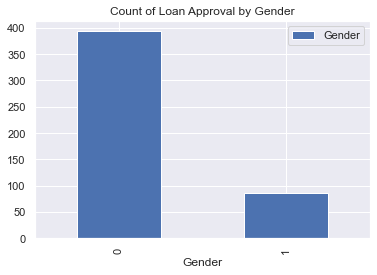

In [16]:
#Creating a dataframe grouping by the column 'Gender'
gender_df = train_df.groupby('Gender')


#Record count number of data points for each day
gender_count_df = pd.DataFrame.from_dict(gender_df['Gender'].count())
gender_count_df

#Bar Chart based off of the group series 
gender_count_chart = gender_count_df.plot(kind='bar', title= "Count of Loan Approval by Gender")


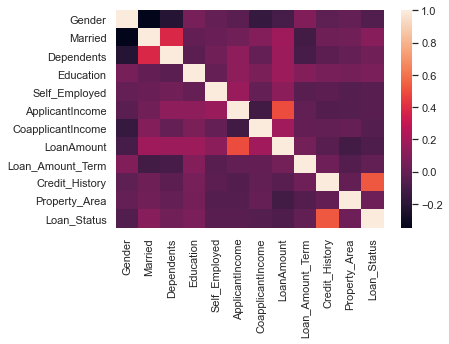

In [17]:
#checking for multicollinearity
corr = train_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.autoscale()

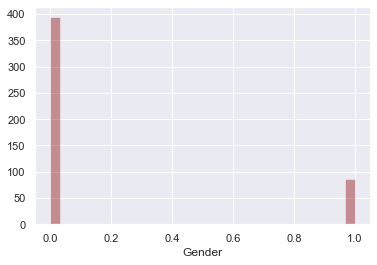

In [18]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Gender'],kde=False,color='darkred',bins=30)

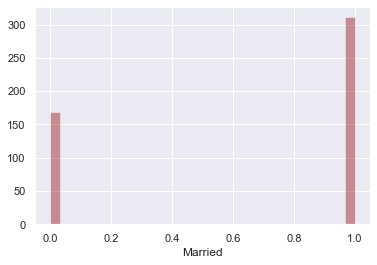

In [19]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Married'],kde=False,color='darkred',bins=30)

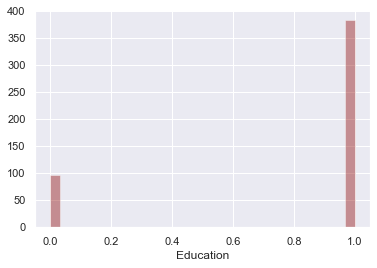

In [20]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Education'],kde=False,color='darkred',bins=30)

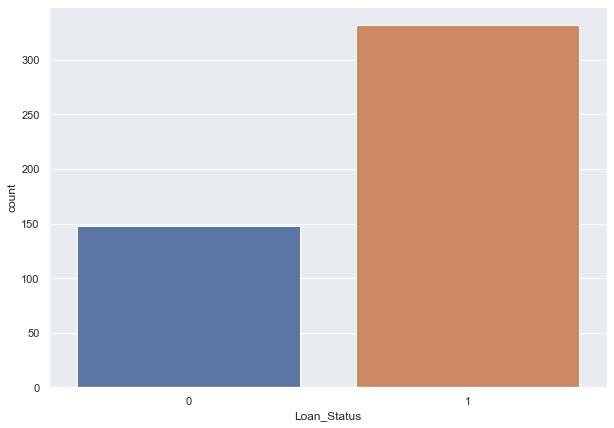

In [21]:
# Create bar chart to visualize loan status
plt.figure(figsize = (10.,7))
sns.countplot(train_df['Loan_Status'])

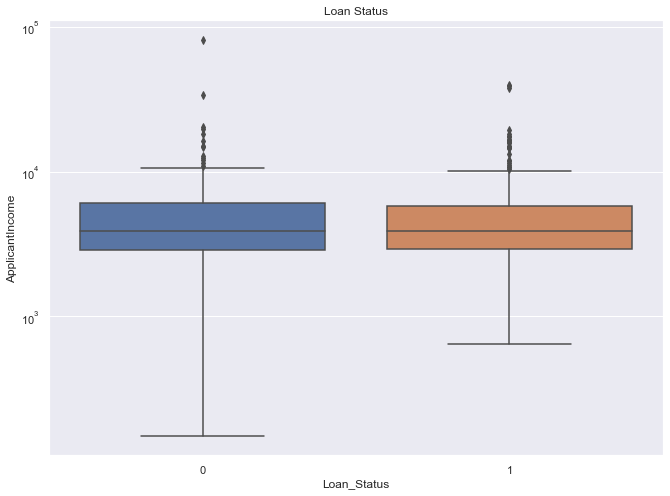

The median requested Applicant Income amount for approved contracts is nan.
The median requested Applicant Income amount for refused contracts is  nan.


In [22]:

#Create boxplot for Loan status depends on Applicant Income

plt.figure(figsize=(11,8))
loan_status_boxplot = sns.boxplot(x = 'Loan_Status' , y = 'ApplicantIncome',data = train_df)
loan_status_boxplot.set_yscale('log')
loan_status_boxplot.set_title('Loan Status')

#plt.savefig("Images/LoanStatusBoxPlot.png")
plt.show()

Approved_loans=train_df.loc[train_df['Loan_Status'].isin(['Approved'])]
Refused_loans=train_df.loc[train_df['Loan_Status'].isin(['Refused'])]

Approved_amount_median=Approved_loans['ApplicantIncome'].median()
Refused_amount_median=Refused_loans['ApplicantIncome'].median()

print(f"The median requested Applicant Income amount for approved contracts is {Approved_amount_median}.")
print(f"The median requested Applicant Income amount for refused contracts is  {Refused_amount_median}.")

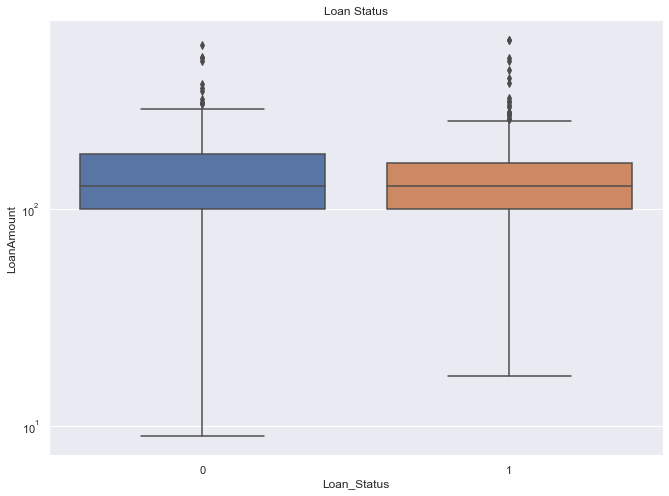

The median requested Applicant Income amount for approved contracts is nan.
The median requested Applicant Income amount for refused contracts is  nan.


In [23]:
#Create boxplot for Loan status depends on Loan Amount

plt.figure(figsize=(11,8))
loan_status_boxplot = sns.boxplot(x = 'Loan_Status' , y = 'LoanAmount',data = train_df)
loan_status_boxplot.set_yscale('log')
loan_status_boxplot.set_title('Loan Status')

# plt.savefig("Images/LoanStatusBoxPlot.png")
plt.show()

Approved_loans=train_df.loc[train_df['Loan_Status'].isin(['Approved'])]
Refused_loans=train_df.loc[train_df['Loan_Status'].isin(['Refused'])]

Approved_amount_median=Approved_loans['LoanAmount'].median()
Refused_amount_median=Refused_loans['LoanAmount'].median()

print(f"The median requested Applicant Income amount for approved contracts is {Approved_amount_median}.")
print(f"The median requested Applicant Income amount for refused contracts is  {Refused_amount_median}.")

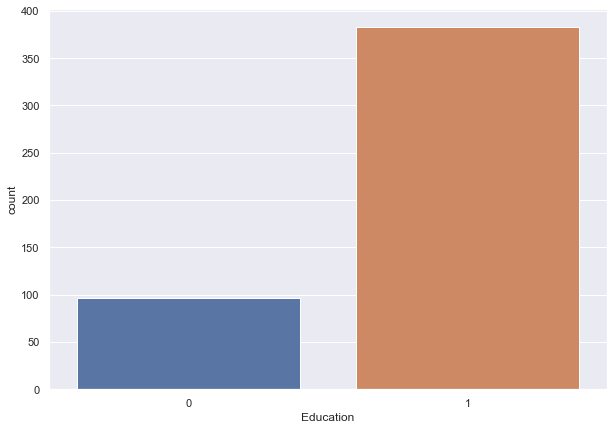

In [24]:
# Create bar chart to visualize education status
plt.figure(figsize = (10.,7))
sns.countplot(train_df['Education'])

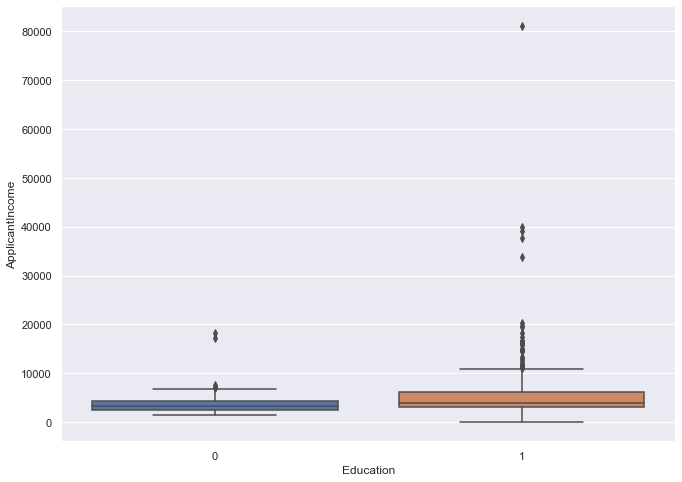

It seems that the graduates have more outliers which means that the people with huge income are most likely well educated.


In [25]:
# Create Box plot using education level against the income

plt.figure(figsize=(11,8))
sns.boxplot(x='Education',y='ApplicantIncome',data=train_df)
# plt.savefig("Images/BoxPlot.png")
plt.show()

print(f"It seems that the graduates have more outliers which means that the people with huge income are most likely well educated.")

In [26]:
#Prepare data before applying model 
#List column names
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
#Target Variable = Loan_Status
X = train_df.drop("Loan_Status", axis=1)
y = train_df["Loan_Status"]

In [28]:
from keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [29]:
#Scale data before training the model 

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [33]:
# Spilt data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.40)

# random_state

# What is the difference between using 90%/10% or randome state? 

In [34]:
# Print Shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((288, 11), (192, 11), (288, 2), (192, 2))

In [35]:
#Build Model and add dense layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

nn_model = Sequential()
nn_model.add(Dense(288, input_dim=11, kernel_initializer = 'normal', activation = 'relu'))
nn_model.add(Dropout(.3))
nn_model.add(Dense(500, activation = 'relu'))

nn_model.add(Dense(2, activation = 'softmax'))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 288)               3456      
_________________________________________________________________
dropout (Dropout)            (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               144500    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1002      
Total params: 148,958
Trainable params: 148,958
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Train Model 

nn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
                  
                  
#                   model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [37]:
# Fit (train) the model
nn_model.fit(
    X_train,
    y_train,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
9/9 - 0s - loss: 0.6260 - accuracy: 0.6806
Epoch 2/500
9/9 - 0s - loss: 0.5137 - accuracy: 0.7986
Epoch 3/500
9/9 - 0s - loss: 0.4676 - accuracy: 0.8160
Epoch 4/500
9/9 - 0s - loss: 0.4626 - accuracy: 0.8090
Epoch 5/500
9/9 - 0s - loss: 0.4473 - accuracy: 0.8090
Epoch 6/500
9/9 - 0s - loss: 0.4447 - accuracy: 0.8194
Epoch 7/500
9/9 - 0s - loss: 0.4239 - accuracy: 0.8229
Epoch 8/500
9/9 - 0s - loss: 0.4043 - accuracy: 0.8194
Epoch 9/500
9/9 - 0s - loss: 0.4123 - accuracy: 0.8264
Epoch 10/500
9/9 - 0s - loss: 0.3896 - accuracy: 0.8368
Epoch 11/500
9/9 - 0s - loss: 0.3920 - accuracy: 0.8333
Epoch 12/500
9/9 - 0s - loss: 0.3830 - accuracy: 0.8438
Epoch 13/500
9/9 - 0s - loss: 0.3846 - accuracy: 0.8403
Epoch 14/500
9/9 - 0s - loss: 0.3698 - accuracy: 0.8472
Epoch 15/500
9/9 - 0s - loss: 0.3549 - accuracy: 0.8507
Epoch 16/500
9/9 - 0s - loss: 0.3580 - accuracy: 0.8507
Epoch 17/500
9/9 - 0s - loss: 0.3249 - accuracy: 0.8507
Epoch 18/500
9/9 - 0s - loss: 0.3715 - accuracy: 0.8438
E

Epoch 147/500
9/9 - 0s - loss: 0.1285 - accuracy: 0.9444
Epoch 148/500
9/9 - 0s - loss: 0.1156 - accuracy: 0.9514
Epoch 149/500
9/9 - 0s - loss: 0.1344 - accuracy: 0.9479
Epoch 150/500
9/9 - 0s - loss: 0.1333 - accuracy: 0.9479
Epoch 151/500
9/9 - 0s - loss: 0.1246 - accuracy: 0.9444
Epoch 152/500
9/9 - 0s - loss: 0.1009 - accuracy: 0.9618
Epoch 153/500
9/9 - 0s - loss: 0.1325 - accuracy: 0.9410
Epoch 154/500
9/9 - 0s - loss: 0.1417 - accuracy: 0.9340
Epoch 155/500
9/9 - 0s - loss: 0.1237 - accuracy: 0.9549
Epoch 156/500
9/9 - 0s - loss: 0.1161 - accuracy: 0.9583
Epoch 157/500
9/9 - 0s - loss: 0.1072 - accuracy: 0.9618
Epoch 158/500
9/9 - 0s - loss: 0.1203 - accuracy: 0.9444
Epoch 159/500
9/9 - 0s - loss: 0.1208 - accuracy: 0.9444
Epoch 160/500
9/9 - 0s - loss: 0.1137 - accuracy: 0.9514
Epoch 161/500
9/9 - 0s - loss: 0.1143 - accuracy: 0.9583
Epoch 162/500
9/9 - 0s - loss: 0.0914 - accuracy: 0.9688
Epoch 163/500
9/9 - 0s - loss: 0.1102 - accuracy: 0.9375
Epoch 164/500
9/9 - 0s - loss: 

Epoch 291/500
9/9 - 0s - loss: 0.0748 - accuracy: 0.9722
Epoch 292/500
9/9 - 0s - loss: 0.0734 - accuracy: 0.9653
Epoch 293/500
9/9 - 0s - loss: 0.0615 - accuracy: 0.9792
Epoch 294/500
9/9 - 0s - loss: 0.0867 - accuracy: 0.9653
Epoch 295/500
9/9 - 0s - loss: 0.0726 - accuracy: 0.9688
Epoch 296/500
9/9 - 0s - loss: 0.0803 - accuracy: 0.9653
Epoch 297/500
9/9 - 0s - loss: 0.0575 - accuracy: 0.9861
Epoch 298/500
9/9 - 0s - loss: 0.0607 - accuracy: 0.9792
Epoch 299/500
9/9 - 0s - loss: 0.0494 - accuracy: 0.9896
Epoch 300/500
9/9 - 0s - loss: 0.0538 - accuracy: 0.9826
Epoch 301/500
9/9 - 0s - loss: 0.0505 - accuracy: 0.9861
Epoch 302/500
9/9 - 0s - loss: 0.0505 - accuracy: 0.9826
Epoch 303/500
9/9 - 0s - loss: 0.0523 - accuracy: 0.9757
Epoch 304/500
9/9 - 0s - loss: 0.0538 - accuracy: 0.9792
Epoch 305/500
9/9 - 0s - loss: 0.0571 - accuracy: 0.9861
Epoch 306/500
9/9 - 0s - loss: 0.0551 - accuracy: 0.9792
Epoch 307/500
9/9 - 0s - loss: 0.0536 - accuracy: 0.9826
Epoch 308/500
9/9 - 0s - loss: 

Epoch 435/500
9/9 - 0s - loss: 0.0249 - accuracy: 0.9965
Epoch 436/500
9/9 - 0s - loss: 0.0325 - accuracy: 0.9931
Epoch 437/500
9/9 - 0s - loss: 0.0313 - accuracy: 0.9861
Epoch 438/500
9/9 - 0s - loss: 0.0382 - accuracy: 0.9861
Epoch 439/500
9/9 - 0s - loss: 0.0951 - accuracy: 0.9826
Epoch 440/500
9/9 - 0s - loss: 0.0335 - accuracy: 0.9931
Epoch 441/500
9/9 - 0s - loss: 0.0287 - accuracy: 0.9896
Epoch 442/500
9/9 - 0s - loss: 0.0442 - accuracy: 0.9826
Epoch 443/500
9/9 - 0s - loss: 0.0423 - accuracy: 0.9931
Epoch 444/500
9/9 - 0s - loss: 0.0331 - accuracy: 0.9861
Epoch 445/500
9/9 - 0s - loss: 0.0339 - accuracy: 0.9896
Epoch 446/500
9/9 - 0s - loss: 0.0391 - accuracy: 0.9826
Epoch 447/500
9/9 - 0s - loss: 0.0311 - accuracy: 0.9861
Epoch 448/500
9/9 - 0s - loss: 0.0253 - accuracy: 0.9931
Epoch 449/500
9/9 - 0s - loss: 0.0206 - accuracy: 0.9965
Epoch 450/500
9/9 - 0s - loss: 0.0338 - accuracy: 0.9931
Epoch 451/500
9/9 - 0s - loss: 0.0257 - accuracy: 0.9965
Epoch 452/500
9/9 - 0s - loss: 

In [38]:
## Quantifying the Model
# We use our testing data to validate our model. This is how we determine the validity of our model 
# (i.e. the ability to predict new and previously unseen data points)

model_loss, model_accuracy = nn_model.evaluate(
    X_test, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 2.2733 - accuracy: 0.7865
Normal Neural Network - Loss: 2.2733101844787598, Accuracy: 0.7864583134651184
